In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')#le damos estilo a los warnings
warnings.filterwarnings('ignore')

In [9]:
#leemos el CSV de AAPL
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-17,109.720001,112.199997,108.709999,110.339996,109.023926,178011000
1,2020-09-18,110.400002,110.879997,106.089996,106.839996,105.565659,287104900
2,2020-09-21,104.540001,110.190002,103.099998,110.080002,108.767021,195713800
3,2020-09-22,112.680000,112.860001,109.160004,111.809998,110.476395,183055400
4,2020-09-23,111.620003,112.110001,106.769997,107.120003,105.842339,150718700
...,...,...,...,...,...,...,...
247,2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139908,140893200
248,2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716675,102404300
249,2021-09-14,150.350006,151.070007,146.910004,148.119995,147.294617,109296300
250,2021-09-15,148.559998,149.440002,146.369995,149.029999,148.199554,83281300


In [10]:
#Set the date column as the index
#Establecer la columna de fecha como índice
df.index = pd.to_datetime(df['Date'])
#Drop the date column
#Suelta/eliminamos la columna de fecha
df = df.drop(['Date'], axis= 'columns')
#Show the data
#Mostrar los datos
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-17,109.720001,112.199997,108.709999,110.339996,109.023926,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,105.565659,287104900
2020-09-21,104.540001,110.190002,103.099998,110.080002,108.767021,195713800
2020-09-22,112.680000,112.860001,109.160004,111.809998,110.476395,183055400
2020-09-23,111.620003,112.110001,106.769997,107.120003,105.842339,150718700
...,...,...,...,...,...,...
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139908,140893200
2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716675,102404300
2021-09-14,150.350006,151.070007,146.910004,148.119995,147.294617,109296300


In [11]:
#Create the independent variables
#Crear las variables independientes
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [12]:
#Store the independent variables in a variable called 'X'
#Almacenar las variables independientes en una variable llamada 'X'
X = df[['Open-Close', 'High-Low', 'Close']]
#Show the first 5 rows of data
#Mostrar las primeras 5 filas de datos
X.head()

,Open-Close,High-Low,Close
Date,,,
2020-09-17,-0.619995,3.489998,110.339996
2020-09-18,3.560006,4.790001,106.839996
2020-09-21,-5.540001,7.090004,110.080002
2020-09-22,0.870002,3.699997,111.809998
2020-09-23,4.500000,5.340004,107.120003


In [13]:
#Store the target variable into a variable called 'y'
#If tomorrows close price is greater than todays close price
#then put 1 else put 0
#Almacenar la variable objetivo en una variable llamada 'y'
#Si el precio de cierre de mañana es mayor que el precio de cierre de hoy
#luego pon 1 sino pon 0
#verifico el precio de cierre de mañana
# es mayor que el prcio de cierre de hoy
y = np.where(df.Close.shift(-1) > df.Close, 1, 0)
y

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [14]:
#Get the percentage to split the data(90% train data set, and 10% test data set)
#Obtener el porcentaje para dividir los datos
#(90 % del conjunto de datos de entrenamiento y 10 % del conjunto de datos de prueba)
percentage_split = 0.9
row = int(df.shape[0] * percentage_split)
#Create the train data set
#Crear el conjunto de datos del entrenamiento
X_train = X[:row]
y_train = y[:row]
#Create the test data set
#Crear el conjunto de datos de prueba
X_test = X[row:]
y_test = y[row:]

In [18]:
#import the library for the machine learning model called Support Vector Classifier(SVC)
#importar la biblioteca para el modelo de aprendizaje automático llamado Support Vector Classifier (SVC)
from sklearn.svm import SVC
#create the model
#crear el modelo
model = SVC()
#Train the model
#Entrenar al modelo
model.fit(X_train[['Open-Close', 'High-Low']], y_train)

SVC()

In [19]:
#Check the score of the model on the train data set
#Comprobar la puntuación del modelo en el conjunto de datos del entrenamiento
model.score(X_train[['Open-Close', 'High-Low']], y_train)

0.5442477876106194

In [20]:
#Check the score of the model on the test data set
#Comprobar la puntuación del modelo en el conjunto de datos de prueba
model.score(X_test[['Open-Close', 'High-Low']], y_test)

0.6153846153846154

In [21]:
#Make and show the models predictions
#Haz y muestra las predicciones de los modelos
df['Predictions'] = model.predict(X[['Open-Close', 'High-Low']])
#Show the predictions
#Mostrar las predicciones
df['Predictions']

Date
2020-09-17    0
2020-09-18    1
2020-09-21    1
2020-09-22    1
2020-09-23    1
             ..
2021-09-10    1
2021-09-13    1
2021-09-14    1
2021-09-15    0
2021-09-16    1
Name: Predictions, Length: 252, dtype: int32

In [24]:
#Calculate the daily returns
#Calcula los retornos diarios
df['Return'] = df['Close'].pct_change(1)
#Show the Returns
#Mostrar las Devoluciones
df['Return']

Date
2020-09-17         NaN
2020-09-18   -0.031720
2020-09-21    0.030326
2020-09-22    0.015716
2020-09-23   -0.041946
                ...   
2021-09-10   -0.033102
2021-09-13    0.003893
2021-09-14   -0.009562
2021-09-15    0.006144
2021-09-16   -0.001610
Name: Return, Length: 252, dtype: float64

In [25]:
#Calculate the strategy returns
#Calcula los retornos de la estrategia
df['Strat_Return'] = df['Predictions'].shift(1) * df['Return']
#Show the Strategy_Return
#Mostrar la estrategia_Retorno
df['Strat_Return']

Date
2020-09-17         NaN
2020-09-18   -0.000000
2020-09-21    0.030326
2020-09-22    0.015716
2020-09-23   -0.041946
                ...   
2021-09-10   -0.033102
2021-09-13    0.003893
2021-09-14   -0.009562
2021-09-15    0.006144
2021-09-16   -0.000000
Name: Strat_Return, Length: 252, dtype: float64

In [26]:
#Calculate the cumulative returns
#Calcular los rendimientos acumulados
#cumsum() La función se usa cuando queremos calcular la suma acumulativa 
#de elementos de la matriz sobre un eje dado
df['Cumul_Ret'] = df['Return'].cumsum()
#Calculation of the strategy cumulative returns
#Cálculo de los retornos acumulados de la estrategia
df['Cumul_Strategy'] = df['Strat_Return'].cumsum()

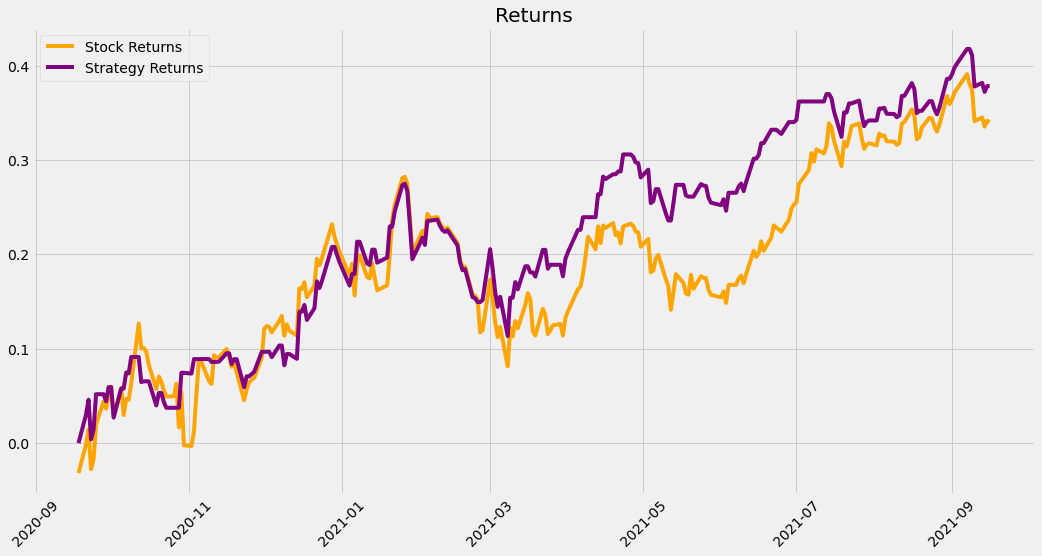

In [28]:
#Visualize and show the data
#Visualizar y mostrar los datos
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'], color='orange', label='Stock Returns')
plt.plot(df['Cumul_Strategy'], color='purple', label='Strategy Returns')
plt.xticks(rotation = 45)#Esto es para que gire el eje x
#para mostrar las leyenda 
#Una leyenda es un área que describe los elementos del gráfico
plt.legend()#Stock Returns y Strategy Returns
plt.show()#Aqui muestra la grafica

In [29]:
#Print the returns
#Imprimir las declaraciones
#Los resultados nos mostrara que la estrategia funciono mejor
print('The stock gives a return of', df['Cumul_Ret'][-1]*100, '%')
print('The strategy gives a return of', df['Cumul_Strategy'][-1]*100, '%')

The stock gives a return of 34.00927027721845 %
The strategy gives a return of 37.84850843508395 %
